In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [2]:
from pycaret.regression import *

In [3]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 18)"


In [4]:
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2709.7261,23519632.5239,4830.3233,0.8330,0.4400,0.3143,0.1660
catboost,CatBoost Regressor,2885.5895,25275337.3326,5008.6528,0.8210,0.4714,0.3449,3.8420
rf,Random Forest Regressor,2757.8183,25373144.2826,5021.4416,0.8170,0.4697,0.3306,0.5590
lightgbm,Light Gradient Boosting Machine,3019.0046,25707769.3341,5060.7445,0.8141,0.5576,0.3774,0.2990
et,Extra Trees Regressor,2785.7426,28689150.0418,5329.5925,0.7971,0.4893,0.3355,0.6500
ada,AdaBoost Regressor,4387.5352,29948557.1581,5463.9776,0.7861,0.6709,0.8084,0.0520
ridge,Ridge Regression,4347.8053,38582855.4000,6191.4842,0.7295,0.6213,0.4461,0.0200
br,Bayesian Ridge,4347.7002,38587318.5779,6191.8455,0.7295,0.6211,0.4460,0.0230
lasso,Lasso Regression,4338.0182,38625783.8000,6194.9582,0.7290,0.6346,0.4445,0.0230
lr,Linear Regression,4341.5354,38666897.6000,6198.0470,0.7288,0.6373,0.4451,2.3580


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
lr = create_model('lr') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4143.1445,33135426.0000,5756.3379,0.8021,0.4623,0.4104
1,4559.7871,45231300.0000,6725.4219,0.7370,0.5675,0.4260
2,3942.8899,32207584.0000,5675.1724,0.5922,0.8463,0.4522
3,3746.0396,26821150.0000,5178.9141,0.7760,0.5074,0.5183
4,4445.8403,43403688.0000,6588.1475,0.6772,0.5206,0.3722
5,4180.5845,36240356.0000,6019.9966,0.7669,0.6456,0.4300
6,4100.5474,39460032.0000,6281.7222,0.7315,0.7801,0.4213
7,4968.9307,46483136.0000,6817.8540,0.7444,0.6416,0.4191
8,4667.5425,41225256.0000,6420.6895,0.7337,0.5977,0.5211
9,4660.0479,42461048.0000,6516.2144,0.7265,0.8044,0.4804


In [12]:
tunedmodel=tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4143.1465,33135418.0000,5756.3374,0.8021,0.4623,0.4104
1,4559.7871,45231308.0000,6725.4224,0.7370,0.5675,0.4260
2,3942.8894,32207556.0000,5675.1699,0.5922,0.8462,0.4522
3,3746.0369,26821134.0000,5178.9126,0.7760,0.5074,0.5183
4,4445.8408,43403688.0000,6588.1475,0.6772,0.5206,0.3722
5,4180.5835,36240336.0000,6019.9946,0.7669,0.6456,0.4300
6,4100.5503,39460028.0000,6281.7217,0.7315,0.7801,0.4213
7,4968.9307,46483132.0000,6817.8540,0.7444,0.6416,0.4191
8,4667.5415,41225248.0000,6420.6890,0.7337,0.5977,0.5211
9,4660.0503,42461028.0000,6516.2129,0.7265,0.8043,0.4804


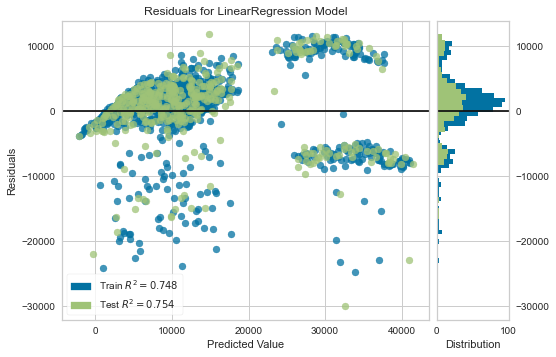

In [13]:
plot_model(tunedmodel)

In [ ]:
evaluate_model(tunedmodel)

In [ ]:
interpret_model(tunedmodel)

# Experiment 2

In [ ]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

In [ ]:
s2[0].columns

In [ ]:
lr = create_model('lr')

In [ ]:
plot_model(lr)

In [16]:
save_model(tunedmodel, 'deployment')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
        

In [17]:
deployment = load_model('deployment')

Transformation Pipeline and Model Successfully Loaded


In [10]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                           learning_rate=0.163, loss='ls',
                                           max_depth=3, max_features='log2',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.5,
                                       

In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'no', 'region':'northwest'})
print(pred.json())